# Discovering the best angels for hitting a base ball with different spins

The main goal of this program is to find out what angels are best for hitting a base ball with certain type of spin will cause it go travel the most distrance in the x direction. 

## Importing necessary files

In [1]:
import ode 
import numpy as np
import matplotlib.pyplot as plt


## Setting the parameters for the system 

In [2]:
#parameters
g = 9.8 #N/kg
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.5 #actually depends on speed
m = 0.145 #kg
b2 = 1/2*Cd*rho*A #will change as Cd changes

S = 0.01 #will change as omega and v change
CL = 0 #will change with S
alpha = 1/2*CL*rho*A*r/S


These are the neccessary variables needed for the program.

## Functions

In [3]:
def mag(v):
    #calculate magnitude of an array
    return np.sqrt(np.dot(v,v))

def hat(v):
    #calculate unit vector of an array
    return v/mag(v)

def cross(v1,v2):
    #calculate the cross product of two vectors
    return np.cross(v1,v2)

def getCd(v):
    # calculate value of drag coefficient for a particular speed and case

    if case == 0:
        Cd = 0
    elif case == 1:
        Cd = 0.5
    elif case == 2:
        a = 0.36
        b = 0.14
        c = 0.27
        vc = 34
        chi = (v - vc)/4
        if chi < 0:
            Cd = a + b/(1+np.exp(chi)) - c*np.exp(-chi**2)
        else:
            Cd = a + b/(1+np.exp(chi)) - c*np.exp(-chi**2/4)
    else:
        Cd = 0.5
    
    return Cd

def model_magnus(d, tn):
    #return array of derivatives
        
    #data
    x = d[0]
    y = d[1]
    z = d[2]  
    vx = d[3]
    vy = d[4]
    vz = d[5]
    
    #derivatives
    rate = np.zeros(6) #derivatives
    rate[0] = vx
    rate[1] = vy
    rate[2] = vz
    
    #speed
    v = np.array([vx,vy,vz])
    vmag = mag(v)
    
    #calculate force and dv/dt
    Cd=getCd(vmag)
    b2 = 1/2*Cd*rho*A
    
    S = r*omegamag/vmag
    CL = 0.62*S**0.7
    alpha = 1/2*CL*rho*A*r/S
    
    FM = alpha*cross(omega,v) #magnus force
    
    rate[3] = -b2*vmag*vx/m + FM[0]/m
    rate[4] = (-b2*vmag*vy - m*g)/m + FM[1]/m
    rate[5] = (-b2*vmag*vz)/m  + FM[2]/m
    
    return rate

def run_magnus(data): # run simulation with case integer
    global b2, alpha #need to change the value of b2 and alpha
    
    v = data[3:6]
    vmag = mag(v)

    #time
    t = 0
    h= 0.01
    Nsteps = int(10/h)

    #store trajectory for plotting or animation
    traj = np.zeros((Nsteps, 4)) #store t, x, y, z for plotting
    traj[0,:] = np.array([t, x0, y0, z0]) #store initial time and position

    for n in range(0,Nsteps-1):

        #update data
        data = ode.RK4(model_magnus, data, t, h )

        #update t
        t = t + h

        #store data for plotting
        traj[n+1,:] = np.array([t, data[0], data[1], data[2]])
    
    return traj


These are the functions needed for program, with run_magnus being the main function used in the program.

## Positive spin in z 

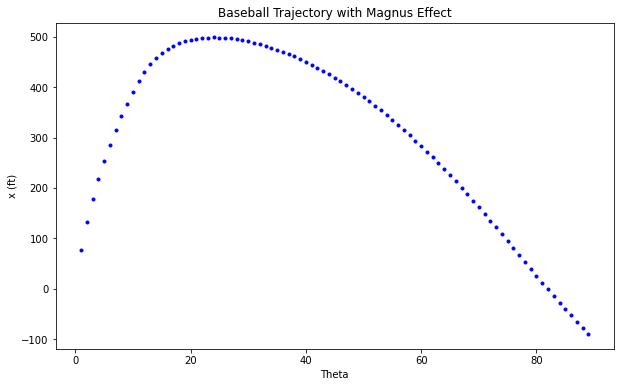

In [4]:
ang = np.zeros(89)
datarange = np.zeros(89)
for i in range(1,90):
    
    # data for home run
    vmag0mph = 111.1 #mph
    thetadeg = i #deg
    spinrate = 1838 #rpm
    #spinrate = 1e-5

    # convert units and create initial conditions
    vmag0 = vmag0mph*0.44704 #convert mph to m/s
    theta = thetadeg*np.pi/180 #convert deg to rad

    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = vmag0*np.cos(theta)
    vy0 = vmag0*np.sin(theta)
    vz0 = 0

    omegamag = spinrate * 2*np.pi / 60 #rad/s
    omega = np.array([0, 0, omegamag])

    # array for instantaneous position and velocity data
    d = np.array([x0, y0, z0, vx0, vy0, vz0])
    
    # run models

    case = 2
    traj = run_magnus(d)
    traj2 = traj[traj[:,2]>=0] #get trajectory data with y>=0


    range2 = traj2[-1,1]

    #print("Variable Cd: range = {:.0f} m = {:.0f} ft. ".format(range2, range2*3.28084))
    #print(i)
    datarange[i-1] = range2*3.28084
    ang[i-1] = i
#plot
fig = plt.figure(figsize=(10,6))
plt.title("Baseball Trajectory with Magnus Effect")
plt.plot(ang,datarange, 'b.', label= 'data')
#plt.plot()
#plt.plot()
plt.xlabel('Theta')
plt.ylabel('x (ft)')
#plt.legend()
plt.show()

As can be seen from the graph the best angels for theta are 23-25 with all of the angels causing the ball to travel a distance of 499 ft.

## Positive spin in y

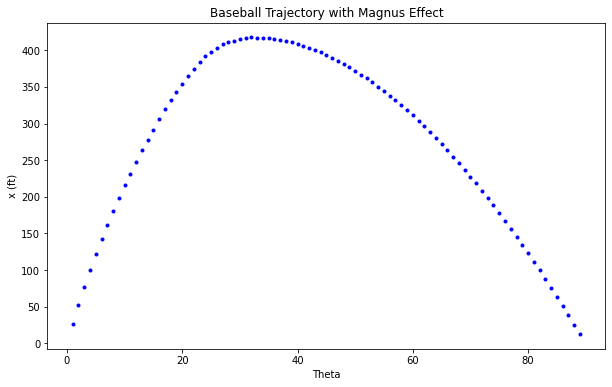

In [5]:
ang = np.zeros(89)
datarange = np.zeros(89)
for i in range(1,90):
    
    # data for home run
    vmag0mph = 111.1 #mph
    thetadeg = i #deg
    spinrate = 1838 #rpm
    #spinrate = 1e-5

    # convert units and create initial conditions
    vmag0 = vmag0mph*0.44704 #convert mph to m/s
    theta = thetadeg*np.pi/180 #convert deg to rad

    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = vmag0*np.cos(theta)
    vy0 = vmag0*np.sin(theta)
    vz0 = 0

    omegamag = spinrate * 2*np.pi / 60 #rad/s
    omega = np.array([0, omegamag, 0])

    # array for instantaneous position and velocity data
    d = np.array([x0, y0, z0, vx0, vy0, vz0])
    
    # run models
    case = 2
    traj = run_magnus(d)
    traj2 = traj[traj[:,2]>=0] #get trajectory data with y>=0


    range2 = traj2[-1,1]

    
    #print("Variable Cd: range = {:.0f} m = {:.0f} ft. ".format(range2, range2*3.28084))
    #print(i)
    datarange[i-1] = range2*3.28084
    ang[i-1] = i
#plot
fig = plt.figure(figsize=(10,6))
plt.title("Baseball Trajectory with Magnus Effect")
plt.plot(ang,datarange, 'b.', label= 'data')
#plt.plot()
#plt.plot()
plt.xlabel('Theta')
plt.ylabel('x (ft)')
#plt.legend()
plt.show()

As we can see from this graph the best angel for theta are 32 with the distance travelled being 418 ft.

## Positive spin in x

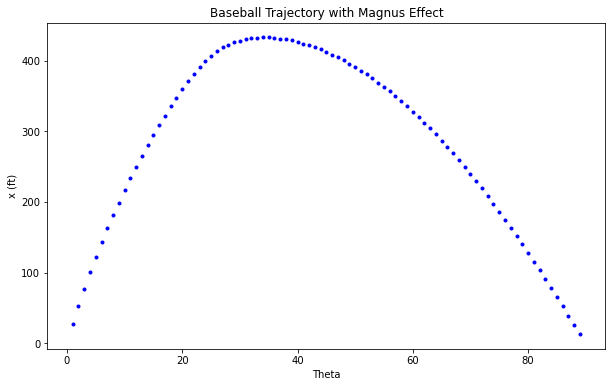

In [6]:
ang = np.zeros(89)
datarange = np.zeros(89)
for i in range(1,90):
    
    # data for home run
    vmag0mph = 111.1 #mph
    thetadeg = i #deg
    spinrate = 1838 #rpm
    #spinrate = 1e-5

    # convert units and create initial conditions
    vmag0 = vmag0mph*0.44704 #convert mph to m/s
    theta = thetadeg*np.pi/180 #convert deg to rad

    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = vmag0*np.cos(theta)
    vy0 = vmag0*np.sin(theta)
    vz0 = 0

    omegamag = spinrate * 2*np.pi / 60 #rad/s
    omega = np.array([omegamag, 0, 0])

    # array for instantaneous position and velocity data
    d = np.array([x0, y0, z0, vx0, vy0, vz0])
    
    # run models
    case = 2
    traj = run_magnus(d)
    traj2 = traj[traj[:,2]>=0] #get trajectory data with y>=0

    range2 = traj2[-1,1]

    
    #print("Variable Cd: range = {:.0f} m = {:.0f} ft. ".format(range2, range2*3.28084))
    #print(i)
    datarange[i-1] = range2*3.28084
    ang[i-1] = i
#plot
fig = plt.figure(figsize=(10,6))
plt.title("Baseball Trajectory with Magnus Effect")
plt.plot(ang,datarange, 'b.', label= 'data')
#plt.plot()
#plt.plot()
plt.xlabel('Theta')
plt.ylabel('x (ft)')
#plt.legend()
plt.show()

As can be seen from the graph the best angels for theta are 34 and 35 with both of the angels causing the ball to travel a distance of 433 ft.

## Negative spin in z 

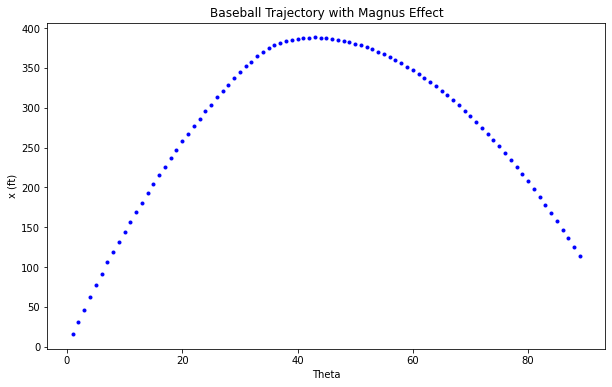

In [7]:
ang = np.zeros(89)
datarange = np.zeros(89)
for i in range(1,90):
    
    # data for home run
    vmag0mph = 111.1 #mph
    thetadeg = i #deg
    spinrate = 1838 #rpm
    #spinrate = 1e-5

    # convert units and create initial conditions
    vmag0 = vmag0mph*0.44704 #convert mph to m/s
    theta = thetadeg*np.pi/180 #convert deg to rad

    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = vmag0*np.cos(theta)
    vy0 = vmag0*np.sin(theta)
    vz0 = 0

    omegamag = spinrate * 2*np.pi / 60 #rad/s
    omega = np.array([0, 0, -omegamag])

    # array for instantaneous position and velocity data
    d = np.array([x0, y0, z0, vx0, vy0, vz0])
    
    # run model
    case = 2
    traj = run_magnus(d)
    traj2 = traj[traj[:,2]>=0] #get trajectory data with y>=0

    
    range2 = traj2[-1,1]

    #print("Variable Cd: range = {:.0f} m = {:.0f} ft. ".format(range2, range2*3.28084))
    #print(i)
    datarange[i-1] = range2*3.28084
    ang[i-1] = i
#plot
fig = plt.figure(figsize=(10,6))
plt.title("Baseball Trajectory with Magnus Effect")
plt.plot(ang,datarange, 'b.', label= 'data')
#plt.plot()
#plt.plot()
plt.xlabel('Theta')
plt.ylabel('x (ft)')
#plt.legend()
plt.show()

As can be seen from the graph the best angels for theta are 42-44 with all of the angels causing the ball to travel a distance of 388 ft.

## Negative spin in y 

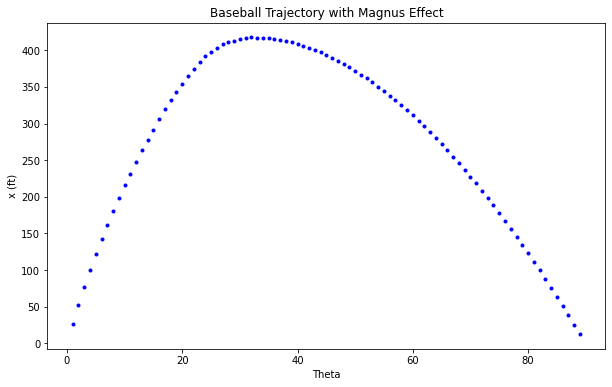

In [8]:
ang = np.zeros(89)
datarange = np.zeros(89)
for i in range(1,90):
    
    # data for home run
    vmag0mph = 111.1 #mph
    thetadeg = i #deg
    spinrate = 1838 #rpm
    #spinrate = 1e-5

    # convert units and create initial conditions
    vmag0 = vmag0mph*0.44704 #convert mph to m/s
    theta = thetadeg*np.pi/180 #convert deg to rad

    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = vmag0*np.cos(theta)
    vy0 = vmag0*np.sin(theta)
    vz0 = 0

    omegamag = spinrate * 2*np.pi / 60 #rad/s
    omega = np.array([0, -omegamag, 0])

    # array for instantaneous position and velocity data
    d = np.array([x0, y0, z0, vx0, vy0, vz0])
    
    # run models
    case = 0 #no air
    traj = run_magnus(d)
    traj0 = traj[traj[:,2]>=0] #get trajectory data with y>=0

    case = 1 #Cd is constant
    traj = run_magnus(d)
    traj1 = traj[traj[:,2]>=0] #get trajectory data with y>=0

    case = 2
    traj = run_magnus(d)
    traj2 = traj[traj[:,2]>=0] #get trajectory data with y>=0

    range2 = traj2[-1,1]

    #print("Variable Cd: range = {:.0f} m = {:.0f} ft. ".format(range2, range2*3.28084))
    #print(i)
    datarange[i-1] = range2*3.28084
    ang[i-1] = i
#plot
fig = plt.figure(figsize=(10,6))
plt.title("Baseball Trajectory with Magnus Effect")
plt.plot(ang,datarange, 'b.', label= 'data')
#plt.plot()
#plt.plot()
plt.xlabel('Theta')
plt.ylabel('x (ft)')
#plt.legend()
plt.show()

As we can see from this graph the best angel for theta are 32 with the distance travelled being 418 ft. Which is the same as for the positve spin.

## Negative spin in z 

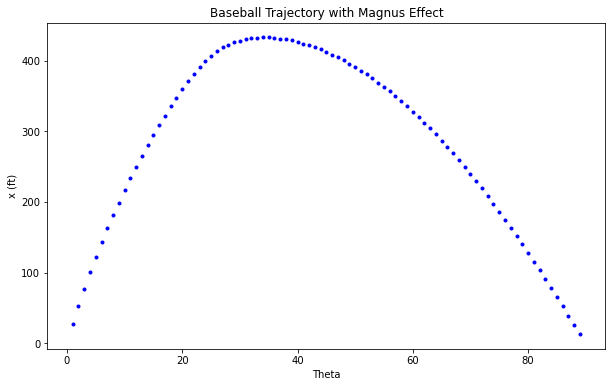

In [9]:
ang = np.zeros(89)
datarange = np.zeros(89)
for i in range(1,90):
    
    # data for home run
    vmag0mph = 111.1 #mph
    thetadeg = i #deg
    spinrate = 1838 #rpm
    #spinrate = 1e-5

    # convert units and create initial conditions
    vmag0 = vmag0mph*0.44704 #convert mph to m/s
    theta = thetadeg*np.pi/180 #convert deg to rad

    x0 = 0
    y0 = 0
    z0 = 0
    vx0 = vmag0*np.cos(theta)
    vy0 = vmag0*np.sin(theta)
    vz0 = 0

    omegamag = spinrate * 2*np.pi / 60 #rad/s
    omega = np.array([-omegamag, 0, 0])

    # array for instantaneous position and velocity data
    d = np.array([x0, y0, z0, vx0, vy0, vz0])
    
    # run models

    case = 2
    traj = run_magnus(d)
    traj2 = traj[traj[:,2]>=0] #get trajectory data with y>=0

    range2 = traj2[-1,1]


    #print("Variable Cd: range = {:.0f} m = {:.0f} ft. ".format(range2, range2*3.28084))
    #print(i)
    datarange[i-1] = range2*3.28084
    ang[i-1] = i
#plot
fig = plt.figure(figsize=(10,6))
plt.title("Baseball Trajectory with Magnus Effect")
plt.plot(ang,datarange, 'b.', label= 'data')
#plt.plot()
#plt.plot()
plt.xlabel('Theta')
plt.ylabel('x (ft)')
#plt.legend()
plt.show()

As can be seen from the graph the best angels for theta are 34 and 35 with both of the angels causing the ball to travel a distance of 433 ft. Which is just the same as the positive spin. 

# Overall Results

There were some very interesting results. The main Thing that stands out is that the only change in optimal angel between postive spin and negative spin happened when the spin was in z, while in the x and y they stayed the same. I was not expecting this at first, but thinking about it when the ball has spin in those directions it would not change much for the ball's distance travelled. though spin in the z which causes top spin would in fact cause a change in the distance travelled. 